# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
from datetime import datetime
import statistics as stat
import math
import matplotlib.pyplot as plt
import seaborn as sns

# импорты для построяения и обучения модели
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Определяем функции для дальнейшей работы

In [2]:
# Читает датасет и меняет названия колонок исходного датафрейма на более удобные
def read_df():
    rd_df = pd.read_csv('main_task.csv')
    rd_df.columns = [
        'id', 'city_name', 'cuisine', 'rank', 'rating', 'price', 
        'reviews count', 'reviews', 'url_ta', 'id_ta'
        ]
    return rd_df

In [3]:
# Удаляет строковые колонки
def drop_non_numeric(ds_df):
    for column_name in ds_df:
        type = ds_df[column_name].dtype
        if type not in ['int64', 'float64']:
            df.drop(column_name, axis='columns', inplace=True)

In [4]:
# Удаляет колонки с пропусками
def fill_gaps(ds_df, value):
    for column_name in ds_df:
        if ds_df[column_name].isna().value_counts()[False] < ds_df.shape[0]:
            ds_df[column_name].fillna(value = value, inplace = True)

In [5]:
# Тестирует модель и выводит МАЕ    
def test_model(tm_df):
    drop_non_numeric(tm_df)
    fill_gaps(tm_df, 0)
    X = tm_df.drop(['rating'], axis = 1)
    y = tm_df['rating']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    regr = RandomForestRegressor(n_estimators=100)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

## Общий взгляд на датасет

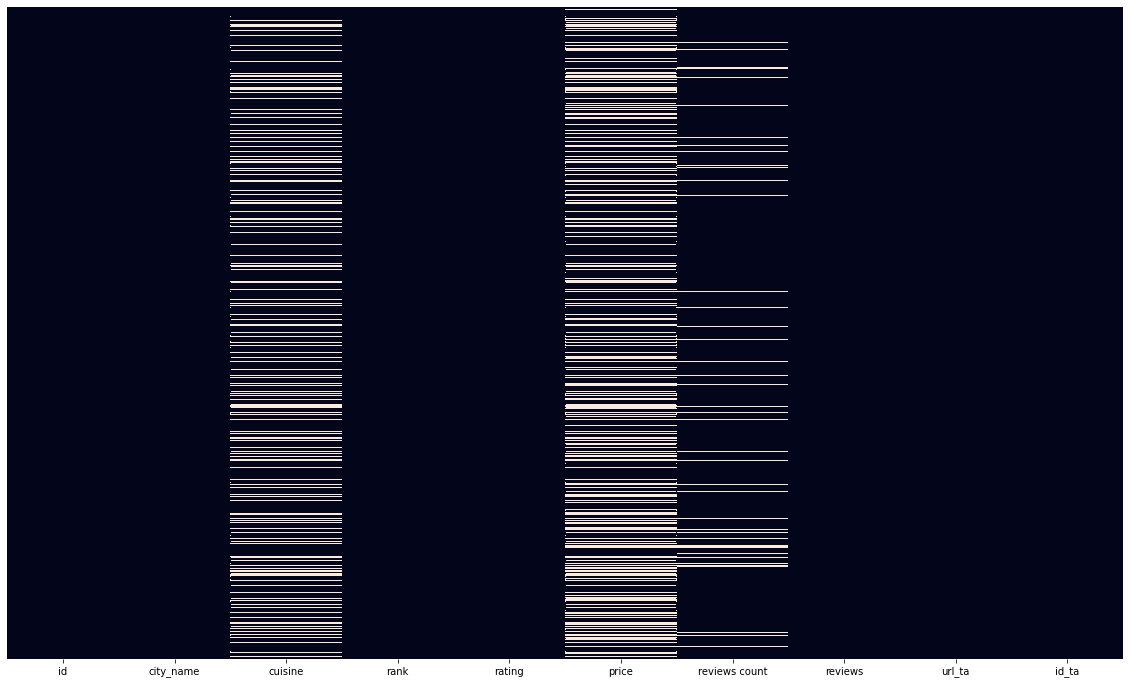

In [6]:
df = read_df()
fig, ax = plt.subplots(figsize=(20, 12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

Видим большое количество пропусков в полях cuisinу и price. Также видим намного меньше пропусков в поле reviews_count.

### Тестируем исходный датасет, удалив строки и пропуски

In [7]:
df = read_df()
test_model(df)

MAE: 0.4305952410714285


## Колонки
Поочередно работаем с колонками, пытаясь преобразовать данные или создать новые на их основе.

### -----> id

Преобразуем id в число.

In [8]:
def id_as_int(iai_df):
    iai_df['id'] = iai_df['id'].str[3:].astype(int)

In [9]:
df = read_df()
id_as_int(df)
test_model(df)

MAE: 0.41587534841269846


Результат улучшился, значит двигаемся в правильном направлении =)

### -----> city

Добавим информацию о том, является ли город столицей, как далеко от столицы он расположен, в какой стране он находится, его неселение и плотность неселения.

Добавим новые данные о  городах.

In [10]:
def city_insights(ci_df):
    # вставим новые столбцы
    ci_df.insert(1, 'city_name_length', ci_df['city_name'].str.len()) # длина имени города
    ci_df.insert(2, 'city_count', 0) # кол-во ресторанов из датасета в этом городе
    ci_df.insert(3, 'city_id', 0) # числовой идентификатор города
    ci_df.insert(4, 'country_id', 0) # числовой идентификатор страны
    ci_df.insert(5, 'is_in_capital', 0) # является ли город столицей
    ci_df.insert(6, 'far_from_capital', 0) # удаленность города от столицы
    ci_df.insert(7, 'city_population', 0) # население города
    ci_df.insert(8, 'city_density', 0) # плотность населения города
    
    # список стран
    countries = [
        'UK', 'France', 'Spain', 'Germany', 'Italy', 'Czech Republic', 'Portugal', 'Austria', 
        'Netherlands', 'Belgium', 'Sweden', 'Hungary', 'Poland', 'Ireland', 'Denmark', 'Greece',
        'Switzerland', 'Norway', 'Finland', 'Slovakia', 'Luxembourg', 'Slovenia'
        ]
    
    # словарь городов
    df_cities = df['city_name'].value_counts().reset_index()
    df_cities.columns = ['name', 'count']
    cities = {}
    count = df_cities['name'].size
    for i in range(0, count):
        city = df_cities.loc[i]
        cities[city['name']] = {
            'id': int(i),
            'count': city['count']
        }
    cities['London'].update({
        'country_id': countries.index('UK'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 9304,
        'density': 5590,
    })
    cities['Paris'].update({
        'country_id': countries.index('France'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 2148,
        'density': 21000,
    })
    cities['Madrid'].update({
        'country_id': countries.index('Spain'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 6618,
        'density': 5337,
    })
    cities['Barcelona'].update({
        'country_id': countries.index('Spain'),
        'is_capital': 0,
        'far_from_capital': 504,
        'population': 5586,
        'density': 16000,
    })
    cities['Berlin'].update({
        'country_id': countries.index('Germany'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 3562038,
        'density': 3809,
    })
    cities['Milan'].update({
        'country_id': countries.index('Italy'),
        'is_capital': 0,
        'far_from_capital': 477,
        'population': 3140000,
        'density': 7700,
    })
    cities['Rome'].update({
        'country_id': countries.index('Italy'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 4257000,
        'density': 2232,
    })
    cities['Prague'].update({
        'country_id': countries.index('Czech Republic'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 1305737,
        'density': 2700,
    })
    cities['Lisbon'].update({
        'country_id': countries.index('Portugal'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 2957000,
        'density': 4883,
    })
    cities['Vienna'].update({
        'country_id': countries.index('Austria'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 2957000,
        'density': 16000,
    })
    cities['Amsterdam'].update({
        'country_id': countries.index('Netherlands'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 1149000,
        'density': 4908,
    })
    cities['Brussels'].update({
        'country_id': countries.index('Belgium'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 2080788,
        'density': 5384,
    })
    cities['Hamburg'].update({
        'country_id': countries.index('Germany'),
        'is_capital': 0,
        'far_from_capital': 255,
        'population': 1790000,
        'density': 2320,
    })
    cities['Munich'].update({
        'country_id': countries.index('Germany'),
        'is_capital': 0,
        'far_from_capital': 255,
        'population': 1538000,
        'density': 4500,
    })
    cities['Lyon'].update({
        'country_id': countries.index('France'),
        'is_capital': 0,
        'far_from_capital': 393,
        'population': 1719000,
        'density': 10000,
    })
    cities['Stockholm'].update({
        'country_id': countries.index('Sweden'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 1633000,
        'density': 4800,
    })
    cities['Budapest'].update({
        'country_id': countries.index('Hungary'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 1768073,
        'density': 3351,
    })
    cities['Warsaw'].update({
        'country_id': countries.index('Poland'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 1783000,
        'density': 3372,
    })
    cities['Dublin'].update({
        'country_id': countries.index('Ireland'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 1228179,
        'density': 4588,
    })
    cities['Copenhagen'].update({
        'country_id': countries.index('Denmark'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 1346000,
        'density': 4400,
    })
    cities['Athens'].update({
        'country_id': countries.index('Greece'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 3153000,
        'density': 17040,
    })
    cities['Edinburgh'].update({
        'country_id': countries.index('UK'),
        'is_capital': 0,
        'far_from_capital': 534,
        'population': 537000,
        'density': 1830,
    })
    cities['Zurich'].update({
        'country_id': countries.index('Switzerland'),
        'is_capital': 0,
        'far_from_capital': 95,
        'population': 1395356,
        'density': 4700,
    })
    cities['Oporto'].update({
        'country_id': countries.index('Portugal'),
        'is_capital': 0,
        'far_from_capital': 300,
        'population': 1313000,
        'density': 6900,
    })
    cities['Geneva'].update({
        'country_id': countries.index('Switzerland'),
        'is_capital': 0,
        'far_from_capital': 130,
        'population': 613373,
        'density': 12000,
    })
    cities['Krakow'].update({
        'country_id': countries.index('Poland'),
        'is_capital': 0,
        'far_from_capital': 252,
        'population': 768731,
        'density': 2328,
    })
    cities['Oslo'].update({
        'country_id': countries.index('Norway'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 693491,
        'density': 1645,
    })
    cities['Helsinki'].update({
        'country_id': countries.index('Finland'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 1305000,
        'density': 3035,
    })
    cities['Bratislava'].update({
        'country_id': countries.index('Slovakia'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 435000,
        'density': 1169,
    })
    cities['Luxembourg'].update({
        'country_id': countries.index('Luxembourg'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 625978,
        'density': 242,
    })
    cities['Ljubljana'].update({
        'country_id': countries.index('Slovenia'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 625978,
        'density': 1712,
    })
        
    # заполняем столбцы
    for city_name, city_data in cities.items():
        ci_df.loc[ci_df['city_name'] == city_name, 'city_id'] = int(city_data['id'])
        ci_df.loc[ci_df['city_name'] == city_name, 'city_count'] = int(city_data['count'])
        ci_df.loc[ci_df['city_name'] == city_name, 'country_id'] = int(city_data['country_id'])
        ci_df.loc[ci_df['city_name'] == city_name, 'is_in_capital'] = int(city_data['is_capital'])
        ci_df.loc[ci_df['city_name'] == city_name, 'far_from_capital'] = int(city_data['far_from_capital'])
        ci_df.loc[ci_df['city_name'] == city_name, 'city_population'] = int(city_data['population'])
        ci_df.loc[ci_df['city_name'] == city_name, 'city_density'] = int(city_data['density'])
        
    df.drop('city_name', axis = 'columns', inplace = True)        
        
        

In [11]:
df = read_df()
id_as_int(df)
city_insights(df)
test_model(df)

MAE: 0.21406549999999996


Поробуем сделать dummy-переменные из города и из страны.

In [12]:
def city_dummies(cd_df):
    cd_df = pd.get_dummies(cd_df, columns = ['city_id'], prefix = 'city_id_')
    return cd_df

In [13]:
def country_dummies(cd_df):
    cd_df = pd.get_dummies(cd_df, columns = ['country_id'], prefix = 'country_id_')
    return cd_df

In [14]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

test_model(df)

MAE: 0.212745


### -----> cuisine

Заполним пропуски самыми часто встречающимися кухнями и сделаем кухни списком.

In [15]:
def cuisine_prepare(cp_df):
    cp_df['cuisine'] = cp_df['cuisine'].fillna("['Vegetarian Friendly', 'European']")
    cp_df['cuisine'] = cp_df['cuisine'] \
        .str.replace("'", '') \
        .str.replace("\[", '') \
        .str.replace("\]", '') \
        .str.split(', ');

Посчитаем кол-во кухонь в каждом ресторане.

In [16]:
def cuisine_count(cc_df):
    cuisine_index = list(cc_df.columns).index('cuisine')
    cc_df.insert(cuisine_index + 1, 'cuisines_count', None)
    cc_df['cuisines_count'] = cc_df['cuisine'].apply(lambda c: len(c))

Превратим кухни в dummy-переменные.

In [17]:
def cuisine_dummies(cd_df):
    cuisines = set(cd_df['cuisine'].explode().tolist())
    for cuisine_name in cuisines:
        column_name = 'cuisine_' + cuisine_name.lower().replace(' ', '_')
        cd_df[column_name] = cd_df['cuisine'].apply(lambda cuisines: int(cuisine_name in cuisines))
    df.drop('cuisine', axis = 'columns', inplace = True)

In [18]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)
cuisine_dummies(df)

test_model(df)

MAE: 0.209358


### -----> price

Превратим ценовую категорию в числовой признак заменив пропуски на среднюю ценовую категорию.

In [19]:
def price_zone(price):
        if price == '$':
            return 0
        elif price == '$$ - $$$':
            return 1
        elif price == '$$$$':
            return 2
        

def price_number(pn_df):
    pn_df['price'].fillna('$$ - $$$', inplace=True)
    pn_df['price'] = pn_df['price'].apply(price_zone).astype(int)

In [20]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)
cuisine_dummies(df)

price_number(df)

test_model(df)

MAE: 0.2056755


### -----> reviews count

Заполним пропуски средним количеством отзывов.

In [21]:
def mean_reviews_count(mrc_df):
    mrc_df['reviews count'].fillna(value = mrc_df['reviews count'].mean(), inplace = True)

In [22]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)
cuisine_dummies(df)

price_number(df)

mean_reviews_count(df)

test_model(df)

MAE: 0.21046499999999996


Видим, что поле с кол-вом отзывов ухудшило результат. Скорее свего нам придется его удалить. Сделаем это позже, после того как посмотрим корреляцию у всех полей.

### -----> reviews

Посчитаем время, прошедшее с последнего отзыва и время между отзывами.

In [23]:
def split_reviews_dates(string):
    split_position = string.find('], [')
    reviews_end_position = split_position
    dates_start_position = split_position + 4
    reviews_string = string[0:reviews_end_position].replace('[', '')
    dates_string = string[dates_start_position:].replace(']', '')
    reviews = list(map(lambda review: review[1:-1], reviews_string.split(', ')))
    dates = list(map(lambda date: date[1:-1], dates_string.split(', ')))
    reviews = list(filter(lambda item: len(item) > 0, reviews))
    dates = list(filter(lambda item: len(item) > 0, dates))
    dates = list(map(lambda item: datetime.strptime(item, '%m/%d/%Y'), dates))
    return reviews, dates

In [24]:
def get_reviews_list(string):
    return split_reviews_dates(string)[0]

In [25]:
def get_dates_list(string):
    return split_reviews_dates(string)[1]

In [26]:
def get_last_date(string):
    dates = get_dates_list(string)
    if len(dates) > 0:
        return max(dates)
    else:
        return datetime.strptime('01/01/1971', '%m/%d/%Y')

In [27]:
def get_time_between(string):
    dates = get_dates_list(string)
    if len(dates) > 1:
        diffs = []
        for i in range(1, len(dates)):
            diffs.append(abs((dates[i] - dates[i-1]).days))
        return  stat.mean(diffs)
    else:
        return 0

In [28]:
def get_time_from_last_review(string):
    last_date = get_last_date(string)
    now = datetime.now()
    from_last = now - last_date
    return from_last.days

In [29]:
 def reviews_insights(ri_df):
    ri_df['reviews'] = ri_df['reviews'].str.replace('\"', '').str.replace('\"', '');
    reviews_index = list(ri_df.columns).index('reviews')
    df.insert(reviews_index + 1, 'reviews_count', None)
    df.insert(reviews_index + 2, 'time_between_reviews', None)
    df.insert(reviews_index + 3, 'time_from_last_review', None)
    df['reviews_count'] = df['reviews'].map(lambda reviews: len(get_reviews_list(reviews)))
    df['time_between_reviews'] = df['reviews'].map(lambda reviews: get_time_between(reviews))
    df['time_from_last_review'] = df['reviews'].map(get_time_from_last_review)
    df.drop('reviews', axis = 'columns', inplace = True)

In [30]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)
cuisine_dummies(df)

price_number(df)

mean_reviews_count(df)

reviews_insights(df)

test_model(df)

MAE: 0.20895099999999997


### -----> url_ta

Очень интересное поле. Понятно, что можно спарсить оттуда много чего интересного и посмотреть, что получится, но, к сожалению, времени на это нет. Просто удалим.

Хотя, если честно, непонятно зачем предсказывать рейтинг ресторана на трипэдвизоре, имея доступ к странице ресторана на нем же.

In [31]:
def drop_url_ta(dut_df):
    df.drop('url_ta', axis = 'columns', inplace = True)

### -----> id_ta
Преобразуем id_ta в число, предполагая, что id может нам показать давность появления ресторана в базе данных tripadvisor.

In [32]:
def id_ta_as_int(itai_df):
    itai_df['id_ta'] = itai_df['id_ta'].str[1:].astype(int)

## Посмотрим корреляцию по признакам

<AxesSubplot:>

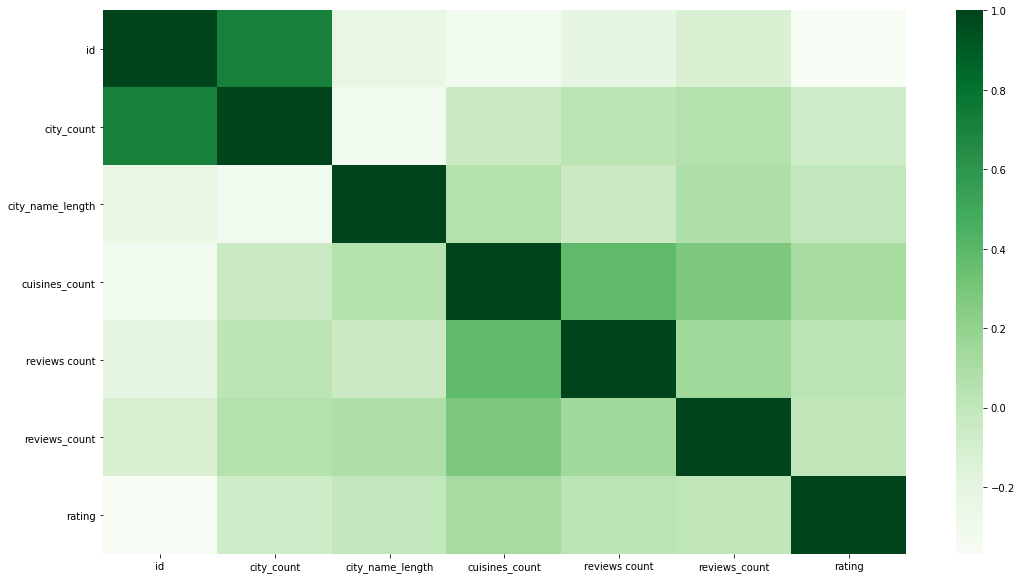

In [60]:
df_corr = df[['id', 'city_count', 'city_name_length', 'cuisines_count', 'reviews count', 'reviews_count', 'rating']]

fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(df_corr.corr(), cmap = 'Greens')

In [34]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)
cuisine_dummies(df)

price_number(df)

mean_reviews_count(df)

reviews_insights(df)

drop_url_ta(df)

id_ta_as_int(df)

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [35]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['rating'], axis = 1)
y = df['rating']

In [36]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [37]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [38]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [39]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [40]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21074099999999998
